In [1]:
library("ggplot2")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# 1. Распределение Пуассона

$
\huge{a(x) = \frac{1}{x!}, \ C(\theta) = e^{\theta}, \ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = \lambda}
$

$
\huge{G(\theta) = log(C(\theta)), \ \mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = \frac{\theta}{1 - \alpha}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \frac{\theta}{1 - \alpha}}
$

In [2]:
rho <- function(tms){
    n <- length(tms)
#     n <- 1000
    rh <- rep(0, times=n)
    p2 <- 0
    mn <- mean(tms)
    for (i in 1 : n){
        p2 <- p2 + (tms[i] - mn)^2
    }
    for (k in 0 : n - 1){
        l <- n - k
        for (t in 1 : l){
            rh[k + 1] = rh[k + 1] + (tms[t] - mn) * (tms[t + k] - mn) / p2
        }
    }
    
    return(rh)
}

In [3]:
lse_alpha <- function(tms){
    p1 <- 0
    p2 <- 0
    p3 <- 0
    p4 <- 0
    n <- length(tms)
    for (t in 2 : n){
        p1 <- p1 + tms[t] * tms[t - 1]
        p2 <- p2 + tms[t]
        p3 <- p3 + tms[t - 1]
        p4 <- p4 + tms[t - 1] ^ tms[t - 1]
    }
    alpha <- (p1 - p2 * p3 / (n - 1)) / (p4 - p3 * p3 / (n - 1))
    return(alpha)
}

In [4]:
poinar <- function(n, alpha, lambda){
    len <- n + 1
    x <- rep(1, times = len)
    x[1] <- ceiling(lambda / (1 - alpha))
    xi <- rpois(len, lambda)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
#         x[i] <- rbinom(1, x[i - 1], alpha) + xi[i]
    }
    return(stats::ts(x[2:len]))
}

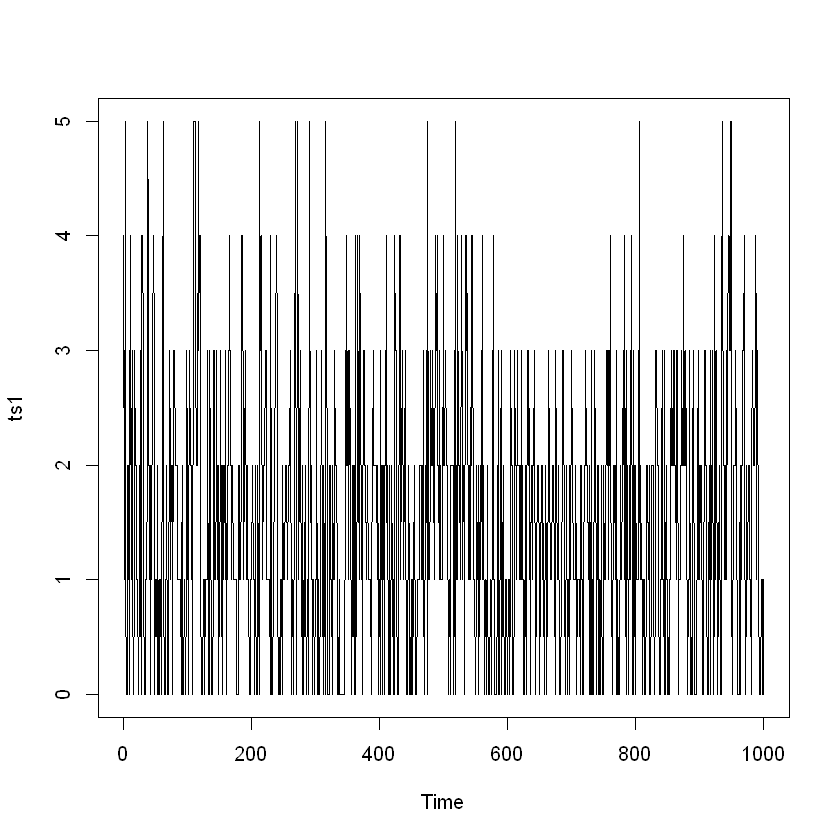

In [20]:
alpha = 0.3
lambda = 1
ts1 <- poinar(n = 1000, alpha = alpha, lambda = lambda)
plot(ts1)

In [21]:
mean(ts1)

[1] 1.487

In [22]:
var(ts1)

[1] 1.467298

$\mathbb{E}[X_t] = \mathbb{D}[X_t] = \frac{\theta}{1 - \alpha} = \frac{\theta}{1 - \alpha} = \frac{1}{0.7} = 1.42857142857143
$

In [23]:
rho1 <- rho(ts1)

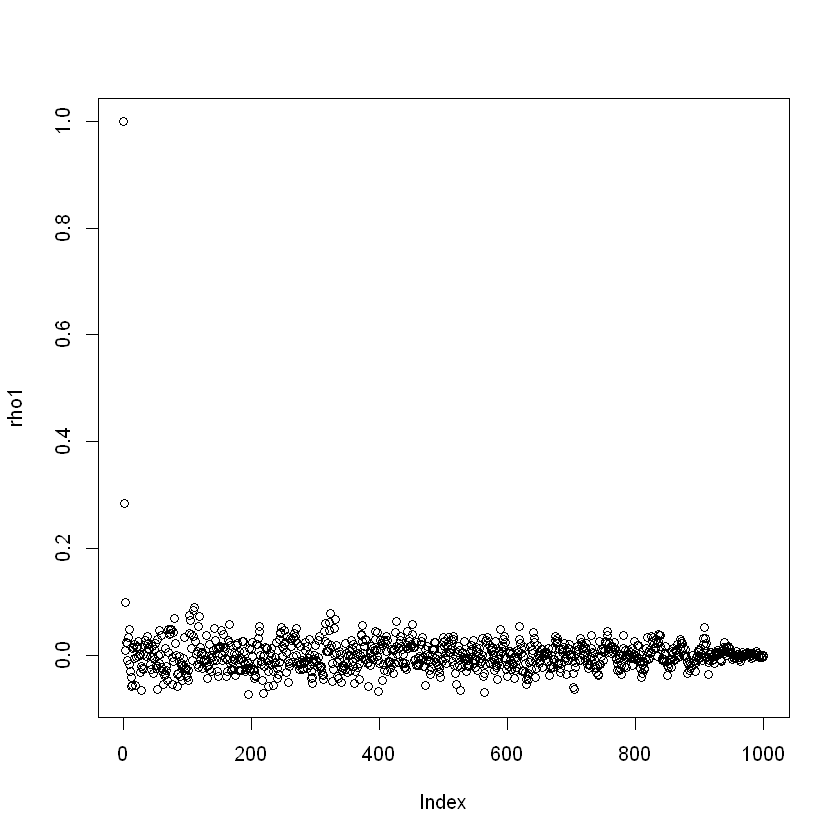

In [36]:
plot(rho1)

$ \hat{\alpha} = \hat{\rho}(1):
$

In [25]:
rho1[2]

[1] 0.2845177

$
\hat{\lambda} = \hat{\theta} = (1 - \hat{\alpha}) \overline{X}:
$

In [26]:
(1 - rho1[2] )* mean(ts1)

[1] 1.063922

In [27]:
lse_alpha(ts1)

[1] 0.005892654

# 2. Геометрическое распределение

$
\huge{a(x) = 1, \ C(\theta) = \frac{1}{1 - \theta}, \ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = 1 - p}
$

$
\huge{G(\theta) = log(C(\theta)), \ \mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = \frac{\theta}{(1 - \alpha)(1-\theta)}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \frac{\theta + \alpha \theta (1 - \theta)}{(1 - \alpha^2)(1-\theta)^2}}
$

In [28]:
ginar <- function(n, alpha, p){
    len <- n + 1
    x <- rep(1, times = len)
    xi <- rgeom(len, p)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
    }
    return(stats::ts(x[2: len]))
}

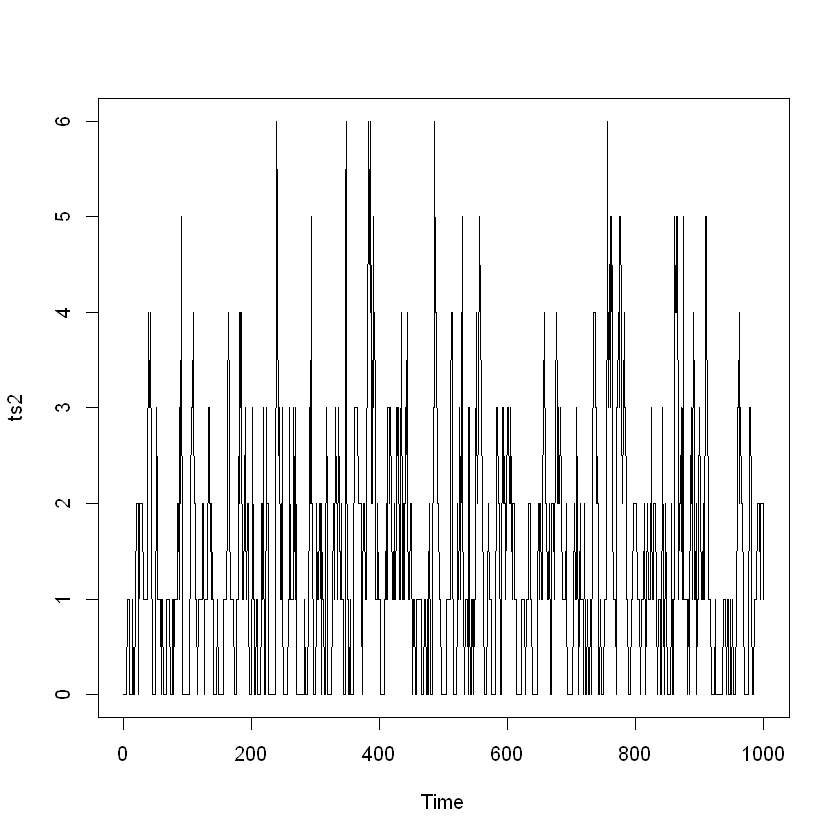

In [29]:
alpha <- 0.7
p <- 0.7
ts2 <- ginar(n = 1000, alpha = 0.7, p = 0.7)
plot(ts2)

In [30]:
mean(ts2)

[1] 1.316

$
\mathbb{E}[X]:
$

In [31]:
t <- 1 - p
t / (1 - alpha) / (1 - t)

[1] 1.428571

In [32]:
var(ts2)

[1] 1.657802

$
\mathbb{D}[X]:
$

In [33]:
(t + alpha * t * p) / (1 - alpha ^ 2) / p^2

[1] 1.788715

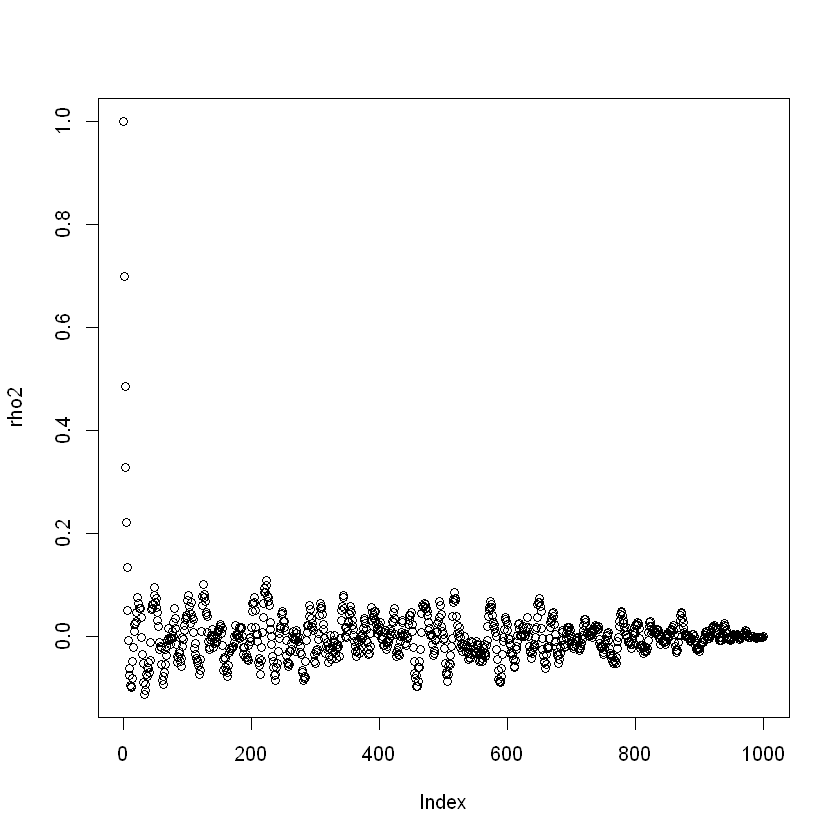

In [35]:
rho2 <- rho(ts2)
plot(rho2)

$ \hat{\alpha} = \hat{\rho}(1):
$

In [37]:
rho2[2]

[1] 0.6990504

$
\huge{\hat{\theta} = \frac{\overline{X} (1 - \hat{\alpha})}{1 + \overline{X}(1 - \hat{\alpha})} = 1 - \hat{p}}:
$

In [38]:
mean(ts2) * (1 - rho2[2]) / (1 + mean(ts2) * (1 - rho2[2]))

[1] 0.2836931

In [39]:
library('actuar')

Warning message:
"package 'actuar' was built under R version 3.6.3"
Attaching package: 'actuar'

The following object is masked from 'package:grDevices':

    cm



# 3. Логарифмическое распределение

$
\huge{a(x) = \frac{1}{x}, \ C(\theta) = -log(1 - \theta), \\ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = p}
$

$
\huge{G(\theta) = log(C(\theta)), \\
\mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = -\frac{\theta}{(1-\alpha)(1-\theta)log(1-\theta)}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \mathbb{E}[X_t] + \frac{\theta^2}{1 - \alpha^2} \left(-\frac{1+log(1-\theta)}{(1 - \theta)^2 log^2(\frac{1}{1 - \theta})}\right)}
$

In [41]:
loginar <- function(n, alpha, p){
    len <- n + 1
    x <- rep(1, times = len)
    xi <- rlogarithmic(len, p)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
    }
    return(stats::ts(x[2: len]))
}

In [42]:
ts3 <- loginar(n = 1000, alpha = 0.7, p = 0.7)

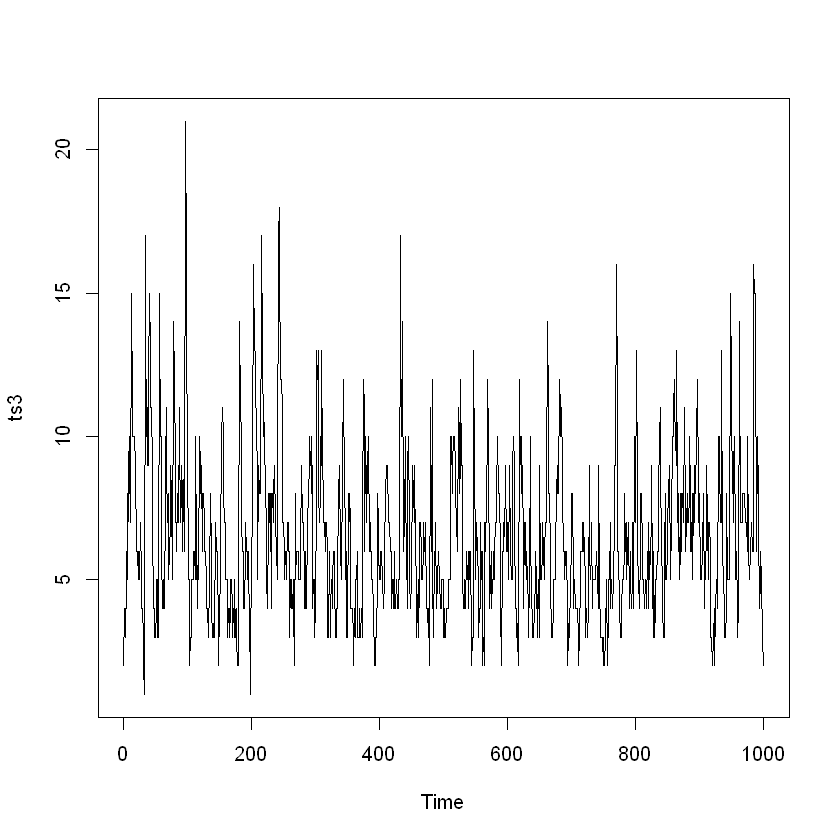

In [43]:
plot(ts3)

In [44]:
mean(ts3)

[1] 6.502

In [45]:
alpha = 0.7
p = 0.7

In [46]:
E <- -p / (1 - alpha) / log(1-p) / (1-p)
E

[1] 6.460094

In [47]:
var(ts3)

[1] 8.476472

In [48]:
V <- E + p^2 / (1 - alpha^ 2)  * (- (1 + log(1 - p)) / ((1 - p) ^ 2 * (log(1 / (1 - p)))^2))
V

[1] 7.962275

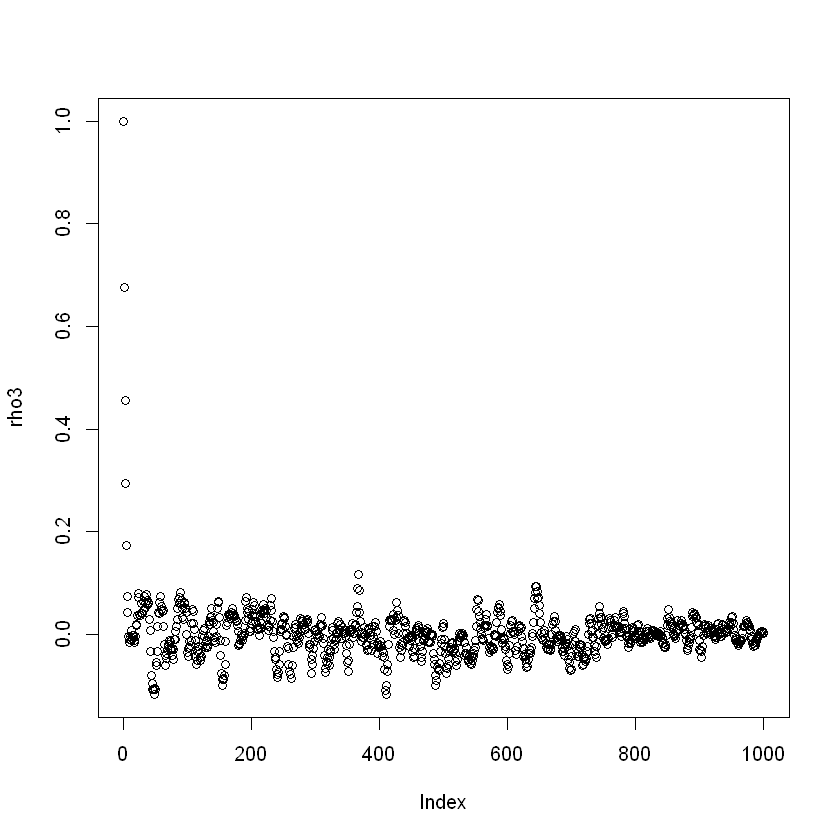

In [49]:
rho3 <- rho(ts3)
plot(rho3)

In [50]:
rho3[2]

[1] 0.6760428

$
\huge{\overline{X} = -\frac{\hat{\theta}}{(1-\hat{\alpha})(1-\hat{\theta})log(1-\hat{\theta})} \Rightarrow 
-\overline{X}(1-\hat{\alpha}) = \frac{\hat{\theta}}{(1-\hat{\theta})log(1-\hat{\theta})}} 
$

In [51]:
-mean(ts3) * (1 - rho3[2])

[1] -2.10637

$
\hat{\theta} = 0.738686
$

# 4. Распределение Бернулли

$
\huge{a(x) = 1, \ C(\theta) = 1 + \theta, \\ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = \frac{p}{1 - p}}
$

$
\huge{G(\theta) = log(C(\theta)), \\
\mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = \frac{\theta}{(1-\alpha)(1+\theta)}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \mathbb{E}[X_t]  - \frac{\theta^2}{(1 - \alpha^2)(1 - \theta)^2}}
$

In [49]:
install.packages('Rlab')

package 'Rlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ilya\AppData\Local\Temp\RtmpENG9Vy\downloaded_packages


In [52]:
library("Rlab")

Rlab 2.15.1 attached.


Attaching package: 'Rlab'

The following objects are masked from 'package:stats':

    dexp, dgamma, dweibull, pexp, pgamma, pweibull, qexp, qgamma,
    qweibull, rexp, rgamma, rweibull

The following object is masked from 'package:datasets':

    precip



In [53]:
berinar <- function(n, alpha, p){
    len <- n + 1
    x <- rep(1, times = len)
    xi <- rbern(len, p)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
    }
    return(stats::ts(x[2:len]))
}

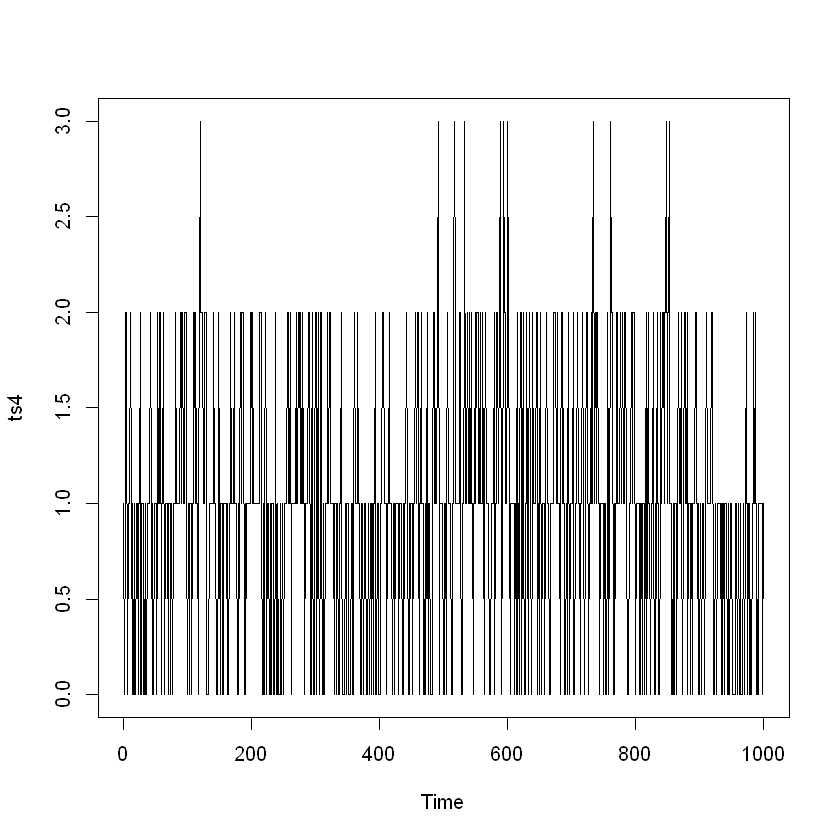

In [61]:
alpha = 0.3
p = 0.7
ts4 <- berinar(n = 1000, alpha = alpha, p = p)
plot(ts4)

In [62]:
mean(ts4)

[1] 0.98

In [63]:
t <- p / (1 - p)
E <- t / (1 - alpha) / (1 + t)
E

[1] 1

In [64]:
var(ts4)

[1] 0.4700701

In [65]:
V <- E - t^2 / (1 - alpha^2) / (1 + t)^2
V

[1] 0.4615385

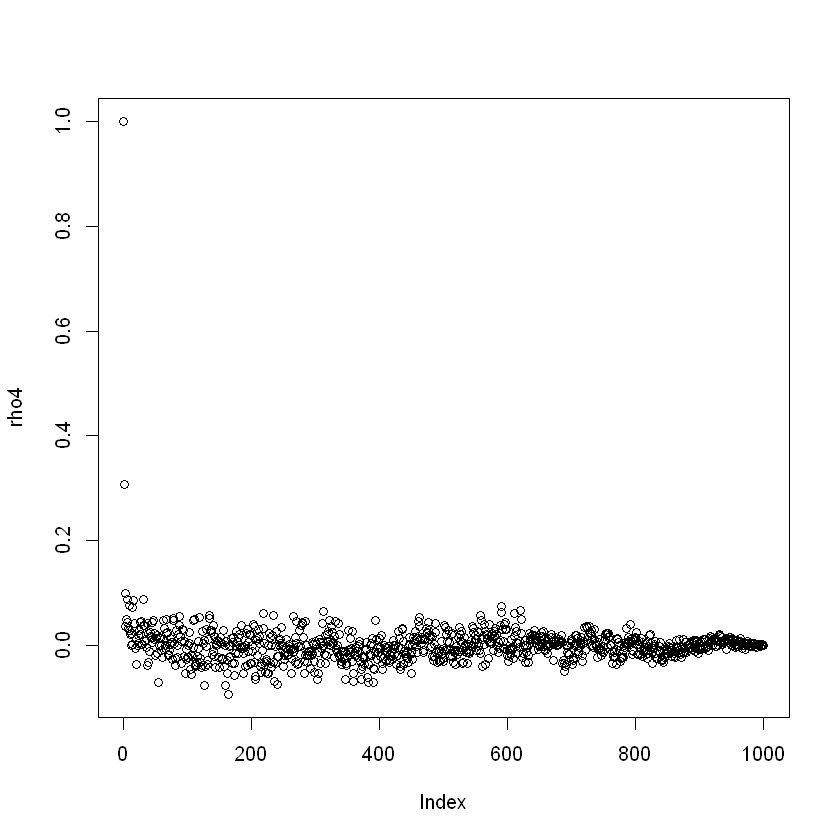

In [66]:
rho4 <- rho(ts4)
plot(rho4)

$\hat{\alpha}:$

In [67]:
rho4[2]

[1] 0.3079208

$\huge{\hat{\theta} = \frac{\overline{X} (1 - \hat{\alpha})}{1 - \overline{X}(1 - \hat{\alpha})} = \frac{\hat{p}}{1 - \hat{p}}}$:

In [70]:
t <- mean(ts4) * (1 - rho4[2]) / (1 - mean(ts4) * (1 - rho4[2]))
t

[1] 2.107884

$
\huge{\hat{p} = \frac{\hat{\theta}}{1 + \hat{\theta}}}
$

In [71]:
t / (1 + t)

[1] 0.6782376

# 5. Биномиальное распределение

$
\huge{a(x) = C^k_n, \ C(\theta) = (1 + \theta)^n, \\ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = \frac{p}{1 - p}}
$

$
\huge{G(\theta) = log(C(\theta)), \\
\mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = \frac{n\theta}{(1-\alpha)(1+\theta)}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \mathbb{E}[X_t]  - \frac{n\theta^2}{(1 - \alpha^2)(1 + \theta)^2}}
$

In [102]:
bininar <- function(n, alpha, p){
    len <- n + 1
    x <- rep(1, times = len)
    xi <- rbinom(len, 10, p)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
    }
    return(stats::ts(x[2:len]))
}

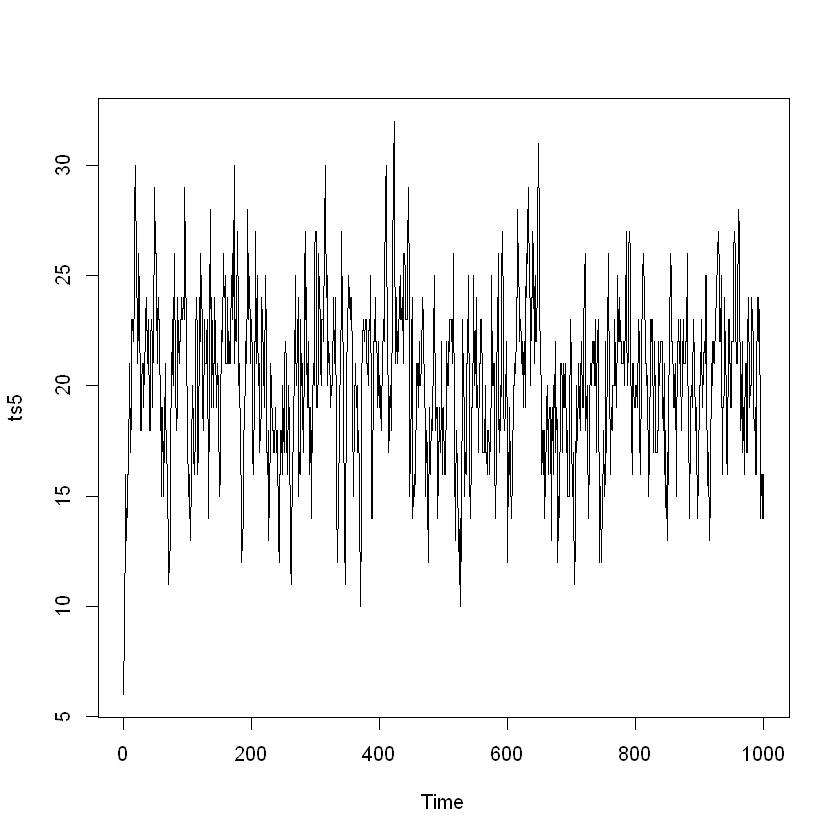

In [103]:
alpha <- 0.7
p <- 0.6
ts5 <- bininar(n=1000, alpha = alpha, p = p)
plot(ts5)

In [104]:
mean(ts5)

[1] 20.184

In [105]:
t <- p / (1 - p)
E <- t / (1 - alpha) / (1 + t) * 10
E

[1] 20

In [106]:
var(ts5)

[1] 13.31746

In [107]:
V <- E - 10 * t^2 / (1 - alpha^2) / (1 + t)^2
V

[1] 12.94118

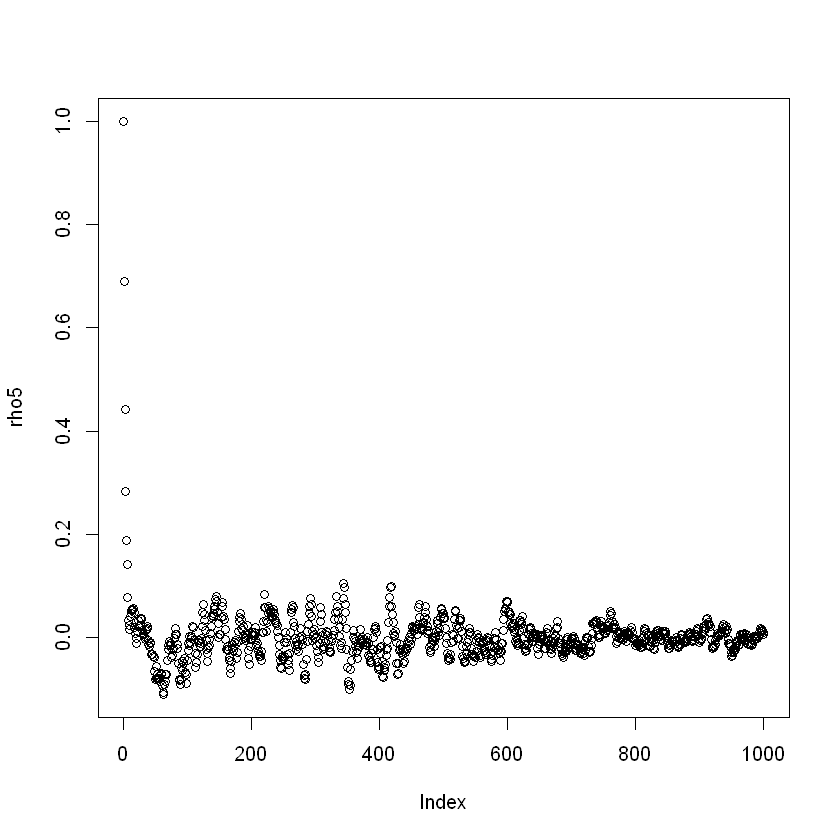

In [108]:
rho5 <- rho(ts5)
plot(rho5)

$
\hat{\alpha}:
$

In [109]:
rho5[2]

[1] 0.6904939

$
\huge{\hat{\theta} = \frac{\overline{X} (1 - \hat{\alpha})}{n - \overline{X}(1 - \hat{\alpha})} = \frac{\hat{p}}{1 - \hat{p}}}
$

In [110]:
t <- mean(ts5) * (1 - rho5[2]) / (10 - mean(ts5) * (1 - rho5[2]))
t

[1] 1.664586

$
\huge{\hat{p} = \frac{\hat{\theta}}{1 + \hat{\theta}}}
$

In [111]:
t / (t + 1)

[1] 0.6247071

# 6. Отрицательное биномиальное распределение

$
\huge{a(x) = \frac{\Gamma(r + x)}{x!\Gamma(r)}, \ C(\theta) = (1 - \theta)^{-r}, \\ \mathbb{P}(\xi = x) = \frac{a(x)\theta^x}{C(\theta)} \Rightarrow \theta = 1 - p}
$

$
\huge{G(\theta) = log(C(\theta)), \\
\mathbb{E}[X_t] = \mu_x = \frac{\theta G'(\theta)}{1 - \alpha} = \frac{r\theta}{(1-\alpha)(1-\theta)}}
$

$
 \huge{\mathbb{D}[X_t] = \mu_x + \frac{\theta^2 G''(\theta)}{1 - \alpha^2} = \mathbb{E}[X_t]  + \frac{r\theta^2}{(1 - \alpha^2)(1 - \theta)^2}}
$

In [112]:
nbininar <- function(n, alpha, p){
    len <- n + 1
    x <- rep(1, times = len)
    xi <- rnbinom(len, 10, p)
    for (i in 2 : len){
        x[i] <- sum(rbinom(n=x[i - 1], 1, prob=alpha)) + xi[i]
    }
    return(stats::ts(x[2:len]))
}

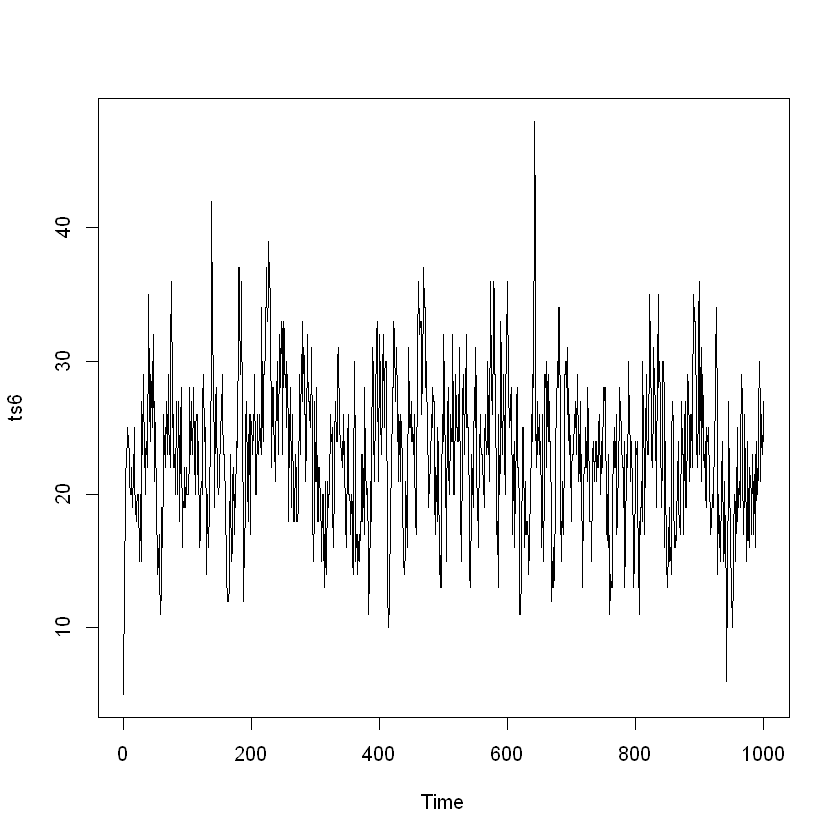

In [113]:
alpha <- 0.7
p <- 0.6
ts6 <- nbininar(n=1000, alpha=alpha, p = p)
plot(ts6)

In [114]:
mean(ts6)

[1] 23.046

In [115]:
t <- 1 - p
# E <- -10 * t / (1 - alpha) / (1 + t)
E <- t / (1 - alpha) / (1 - t) * 10
E

[1] 22.22222

In [116]:
var(ts6)

[1] 30.36225

In [117]:
V <- E + 10 * t^2 / (1 - alpha^2) / (1 - t)^2
V

[1] 30.93682

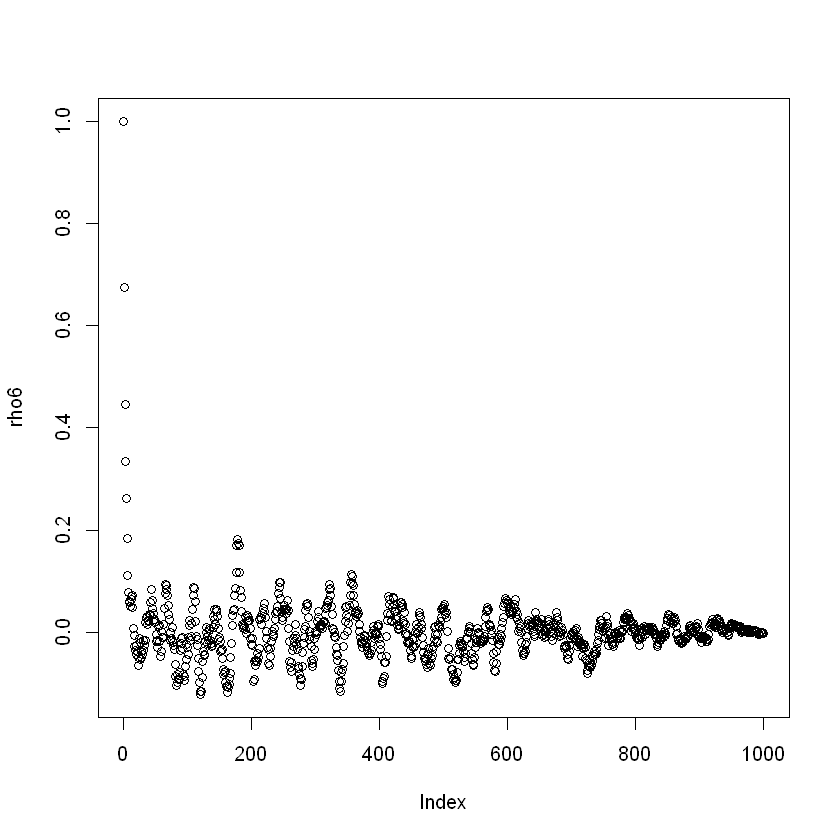

In [118]:
rho6 <- rho(ts6)
plot(rho6)

$
\huge{\hat{\alpha}}:
$

In [119]:
rho6[2]

[1] 0.6739521

$
\huge{\hat{\theta} = \frac{\overline{X}(1 - \hat{\alpha})}{r + \overline{X}(1 - \hat{\alpha})} = 1 - \hat{p}:}
$

In [120]:
mean(ts6) * (1 - rho6[2]) / (10 + mean(ts6) * (1 - rho6[2]))

[1] 0.4290314